## OHE

### pandas

In [12]:
import pandas as pd

# Создаем DataFrame с категориальными данными
data = {'Category': ['A', 'B', 'A', 'C'], "SomeValue": [1, 2, 3, 4]}
df = pd.DataFrame(data)

# Применяем One-Hot Encoding с помощью get_dummies
df_ohe = pd.get_dummies(df, columns=['Category'])
df_ohe

,SomeValue,Category_A,Category_B,Category_C
0,1,True,False,False
1,2,False,True,False
2,3,True,False,False
3,4,False,False,True


In [13]:
df

,Category,SomeValue
0,A,1
1,B,2
2,A,3
3,C,4


### sklearn

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Данные
data = {'Category': ['A', 'B', 'A', 'C'], "SomeValue": [1, 2, 3, 4]}
df = pd.DataFrame(data)

# Создаем OneHotEncoder и преобразуем данные
ohe = OneHotEncoder(sparse_output=False)
encoded = ohe.fit_transform(df[['Category']]).astype(int)

# Добавляем результаты в DataFrame
df_encoded = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['Category']))
df.drop(columns="Category").merge(df_encoded, left_index=True, right_index=True)

,SomeValue,Category_A,Category_B,Category_C
0,1,1,0,0
1,2,0,1,0
2,3,1,0,0
3,4,0,0,1


left_index=True, right_index=True здесь говорят мёрджить по индексу

## Label Encoding

In [16]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Данные
data = {'Category': ['A', 'B', 'A', 'C'], "SomeValue": [1, 2, 3, 4]}
df = pd.DataFrame(data)

# Применяем Label Encoding
le = LabelEncoder()
df['Category_encoded'] = le.fit_transform(df['Category'])
df

,Category,SomeValue,Category_encoded
0,A,1,0
1,B,2,1
2,A,3,0
3,C,4,2


## JOIN

Тестовые данные:

In [1]:
import pandas as pd

# Левый DataFrame
data1 = {'Key': ['A', 'B', 'C', 'D'], 'Value1': [1, 2, 3, 4]}
df1 = pd.DataFrame(data1)

# Правый DataFrame
data2 = {'Key': ['B', 'C', 'D', 'E'], 'Value2': [5, 6, 7, 8]}
df2 = pd.DataFrame(data2)

print("Левый DataFrame:")
print(df1)
print("\nПравый DataFrame:")
print(df2)

Левый DataFrame:
  Key  Value1
0   A       1
1   B       2
2   C       3
3   D       4

Правый DataFrame:
  Key  Value2
0   B       5
1   C       6
2   D       7
3   E       8


### Inner

Inner Join возвращает только строки, которые имеют совпадающие значения в ключевом столбце обоих DataFrame

In [2]:
# Inner Join
inner_join = pd.merge(df1, df2, on='Key', how='inner')
print("\nInner Join:")
print(inner_join)


Inner Join:
  Key  Value1  Value2
0   B       2       5
1   C       3       6
2   D       4       7


### Left

Left Join возвращает все строки из левого DataFrame и только совпадающие строки из правого DataFrame. Если для строки из левого DataFrame нет совпадения в правом, значения из правого DataFrame будут заполнены NaN.

In [ ]:
# Left Join
left_join = pd.merge(df1, df2, on='Key', how='left')
print("\nLeft Join:")
print(left_join)


Left Join:
  Key  Value1  Value2
0   A       1     NaN
1   B       2     5.0
2   C       3     6.0
3   D       4     7.0


### Right

Right Join возвращает все строки из правого DataFrame и только совпадающие строки из левого DataFrame. Если для строки из правого DataFrame нет совпадения в левом, значения из левого DataFrame будут заполнены NaN.

In [5]:
# Right Join
right_join = pd.merge(df1, df2, on='Key', how='right')
print("\nRight Join:")
print(right_join)


Right Join:
  Key  Value1  Value2
0   B     2.0       5
1   C     3.0       6
2   D     4.0       7
3   E     NaN       8


### Outer

Outer Join возвращает все строки из обоих DataFrame. Если для строки из одного DataFrame нет соответствующей строки в другом, значения будут NaN.

In [6]:
# Outer Join
outer_join = pd.merge(df1, df2, on='Key', how='outer')
print("\nOuter Join:")
print(outer_join)


Outer Join:
  Key  Value1  Value2
0   A     1.0     NaN
1   B     2.0     5.0
2   C     3.0     6.0
3   D     4.0     7.0
4   E     NaN     8.0


## Фишки Catboost 

### Feature Importance

In [7]:
from catboost import CatBoostClassifier, Pool
import pandas as pd

# Пример данных
data = {
    'feature1': [1, 2, 3, 4, 5],
    'feature2': [10, 20, 30, 40, 50],
    'feature3': [5, 3, 8, 2, 7],
    'target': [0, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

# Разделение данных на признаки и целевую переменную
X = df.drop(columns='target')
y = df['target']

# Обучаем модель CatBoost
model = CatBoostClassifier(iterations=100, silent=True)
model.fit(X, y)

# Получаем важность признаков
feature_importances = model.get_feature_importance(Pool(X, label=y))
feature_names = X.columns

# Создаем DataFrame для наглядности
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)


Feature Importances:
    Feature  Importance
2  feature3   78.349894
0  feature1   14.245936
1  feature2    7.404170


### Early stopping

In [29]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Пример данных
data = {
    'feature1': np.random.rand(10000),
    'feature2': np.random.rand(10000),
    'feature3': np.random.rand(10000),
    'target': np.random.randint(0, 2, 10000)
}
df = pd.DataFrame(data)

# Разделение данных на обучающую и тестовую выборки
X = df[['feature1', 'feature2', 'feature3']]
y = df['target']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание пула данных
train_pool = Pool(X_train, y_train)
valid_pool = Pool(X_valid, y_valid)

# Инициализация и обучение модели CatBoost
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    eval_metric='Accuracy',
    early_stopping_rounds=50,
    verbose=100  # Печатает прогресс каждые 100 итераций
)

# Обучение модели с использованием ранней остановки
model.fit(
    train_pool,
    eval_set=valid_pool,
    use_best_model=True,  # Использует лучшую модель из ранней остановки
    plot=True  # Отображает график обучения
)

# Предсказания на тестовом наборе
y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Точность на тестовом наборе:", accuracy)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5183750	test: 0.5090000	best: 0.5090000 (0)	total: 4.25ms	remaining: 4.25s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.5125
bestIteration = 23

Shrink model to first 24 iterations.
Точность на тестовом наборе: 0.5125


## Корреляции

![Корреляции](corr.png)

### Пирсон

In [22]:
from scipy.stats import pearsonr

# Пример данных
data = {'feature1': [1, 2, 3, 4, 5], 'feature2': [5, 4, 3, 2, 1]}
df = pd.DataFrame(data)

# Расчёт коэффициента Пирсона
pearson_corr, p_value = pearsonr(df['feature1'], df['feature2'])
print("Коэффициент корреляции Пирсона:", pearson_corr)
print("p-значение:", p_value)

Коэффициент корреляции Пирсона: -1.0
p-значение: 0.0


### Спирман

In [ ]:
from scipy.stats import spearmanr

# Пример данных
data = {'feature1': [1, 2, 3, 4, 5], 'feature2': [3, 1, 4, 5, 2]}
df = pd.DataFrame(data)

# Расчёт коэффициента Спирмена
spearman_corr, p_value = spearmanr(df['feature1'], df['feature2'])
print("Коэффициент корреляции Спирмена:", spearman_corr)
print("p-значение:", p_value)

Коэффициент корреляции Спирмена: 0.19999999999999998
p-значение: 0.747060078104662


### Кендала тау

In [ ]:
from scipy.stats import kendalltau
import pandas as pd

# Пример данных
data = {'rank1': [1, 2, 3, 4, 5], 'rank2': [5, 6, 7, 8, 7]}
df = pd.DataFrame(data)

# Вычисляем корреляцию Кендалла тау
tau, p_value = kendalltau(df['rank1'], df['rank2'])
print("Коэффициент Кендалла тау:", tau)
print("p-значение:", p_value)

Коэффициент Кендалла тау: 0.7378647873726218
p-значение: 0.07697417298126674


### Точечный бисериальный коэф.

Для числовой и бинарной переменных можно использовать точечный бисериальный коэффициент корреляции (если бинарная переменная закодирована как 0 и 1).

In [25]:
from scipy.stats import pointbiserialr

# Пример данных
import pandas as pd
import numpy as np

data = {'numerical': [1.2, 3.4, 5.5, 6.7, 8.9], 'binary': [0, 1, 0, 1, 1]}
df = pd.DataFrame(data)

# Точечный бисериальный коэффициент
corr, p_value = pointbiserialr(df['numerical'], df['binary'])
print("Точечный бисериальный коэффициент:", corr)
print("p-значение:", p_value)

Точечный бисериальный коэффициент: 0.5504280060331562
p-значение: 0.33637507908734265


### ANOVA

Для числовой и категориальной переменных можно использовать ANOVA (анализ дисперсии), который проверяет, различаются ли средние значения числовой переменной для разных категорий.

In [ ]:
from scipy.stats import f_oneway

# Пример данных
data = {'numerical': [1.2, 3.4, 5.5, 6.7, 8.9], 'category': ['A', 'B', 'A', 'B', 'C']}
df = pd.DataFrame(data)

# Группировка по категориям
groups = [df['numerical'][df['category'] == cat] for cat in df['category'].unique()]

# ANOVA тест
f_stat, p_value = f_oneway(*groups)
print("ANOVA F-статистика:", f_stat)
print("p-значение:", p_value)


ANOVA F-статистика: 1.3997277059223967
p-значение: 0.4167139453080676


### Коэф. фи

In [27]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd

# Пример данных
data = {'binary_feature1': [1, 0, 1, 1, 0, 0, 1, 1, 0, 1],
        'binary_feature2': [0, 0, 1, 1, 1, 0, 1, 0, 0, 1]}
df = pd.DataFrame(data)

# Создание таблицы сопряженности
contingency_table = pd.crosstab(df['binary_feature1'], df['binary_feature2'])

# Расчёт коэффициента Фи
chi2, p, dof, expected = chi2_contingency(contingency_table)
phi_coefficient = np.sqrt(chi2 / df.shape[0])
print("Коэффициент Фи:", phi_coefficient)
print("p-значение:", p)


Коэффициент Фи: 0.2041241452319315
p-значение: 0.5186050164287255


### Крамера V

Коэффициент Крамера (V) можно использовать для любых категориальных переменных, независимо от количества значений.

In [26]:
from scipy.stats import chi2_contingency
import numpy as np

# Пример данных
data = {'category1': ['A', 'B', 'A', 'C', 'B'], 'category2': ['X', 'Y', 'X', 'X', 'Y']}
df = pd.DataFrame(data)

# Таблица сопряженности
contingency_table = pd.crosstab(df['category1'], df['category2'])

# Коэффициент Крамера
chi2, p, dof, ex = chi2_contingency(contingency_table)
cramer_v = np.sqrt(chi2 / (df.shape[0] * (min(contingency_table.shape) - 1)))
print("Коэффициент Крамера V:", cramer_v)
print("p-значение:", p)

Коэффициент Крамера V: 1.0
p-значение: 0.0820849986238988


## Кластеризация

### K-Means

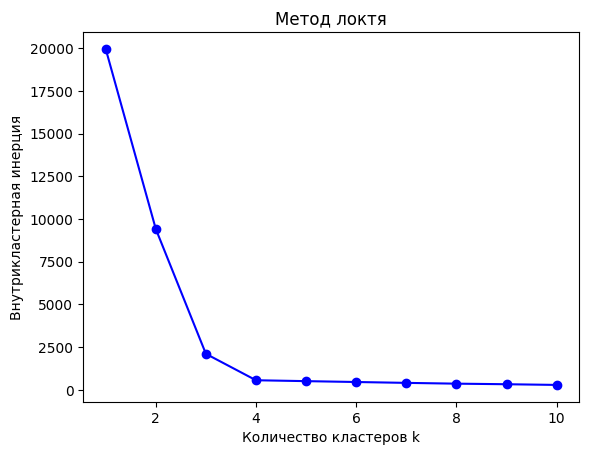

In [30]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Генерация искусственных данных
X, y = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Метод локтя для определения оптимального количества кластеров
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Построение графика метода локтя
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Количество кластеров k')
plt.ylabel('Внутрикластерная инерция')
plt.title('Метод локтя')
plt.show()

In [34]:
optimal_k = 4

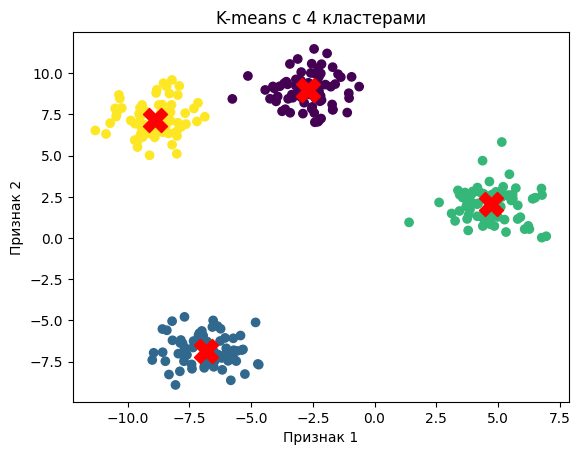

In [35]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Визуализация кластеров
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X')
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title(f"K-means с {optimal_k} кластерами")
plt.show()

### HDBSCAN

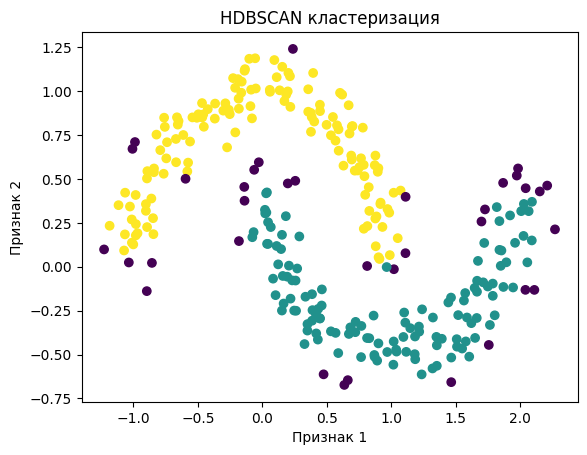

In [37]:
import hdbscan
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Генерация искусственных данных с различной плотностью
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Обучение HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
cluster_labels = clusterer.fit_predict(X)

# Визуализация кластеров
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("HDBSCAN кластеризация")
plt.show()

### Spectral Clustering

c:\Users\Vex\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


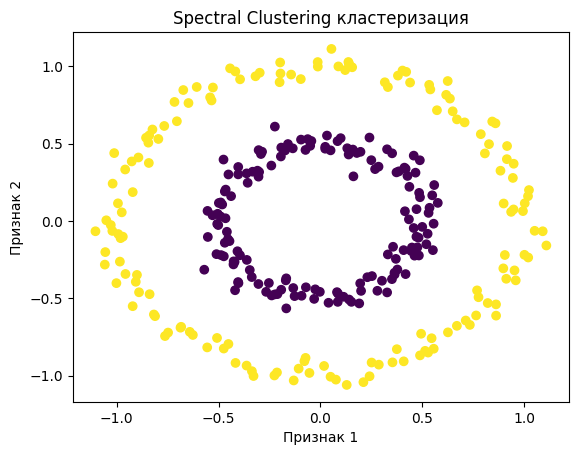

In [38]:
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_circles

# Генерация данных в виде кругов (для проверки на нелинейное разделение)
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05)

# Обучение Spectral Clustering
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X)

# Визуализация кластеров
plt.scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis')
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Spectral Clustering кластеризация")
plt.show()